## Testing how runtime scales with number of phases in the composite

In [1]:
# Import necessary packages
import itertools
import json
import matplotlib.pyplot as plt
import numpy as np
import sys
import time

# Custom imports
sys.path.insert(1, '../core')
from optimization import HashinShtrikman
from user_input import MaterialProperty, Material, MixtureProperty, Mixture, UserInput

/Users/HPSahasrabuddhe/opt/miniconda3/envs/atomate2_10-22/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/HPSahasrabuddhe/opt/miniconda3/envs/atomate2_10-22/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/HPSahasrabuddhe/opt/miniconda3/lib/python3.9/site-packages/mpcontribs/client/__init__.py:88: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


In [2]:
# Testing without calls to generate final dict (faster)
import json
consolidated_dict = {}
with open("consolidated_dict_02_11_2024_23_45_58") as f:
    consolidated_dict = json.load(f)

In [3]:
# Define the number of trials
num_trials = 10

## 2 phase composite

In [4]:
# Example material matches for an n=2 phase compositie
mat_1_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
mat_2_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids}

In [5]:
# Need user input to create an HS instance
# Use same bounds for all materials
properties_mat_1 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=20, lower_bound=1),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.001, lower_bound=1e-5),
    MaterialProperty(prop='bulk_modulus', upper_bound=400, lower_bound=50),
    MaterialProperty(prop='shear_modulus', upper_bound=400, lower_bound=80),
    MaterialProperty(prop='universal_anisotropy', upper_bound=3, lower_bound=0.5),
]

# Define properties for the mixture
properties_mixture = [
    MixtureProperty(prop='elec_cond_300k_low_doping', desired_prop=9),
    MixtureProperty(prop='therm_cond_300k_low_doping', desired_prop=0.007),
    MixtureProperty(prop='bulk_modulus', desired_prop=234),
    MixtureProperty(prop='shear_modulus', desired_prop=150),
    MixtureProperty(prop='universal_anisotropy', desired_prop=1.5),
]

# Create Material & Mixture instances
mat_1 = Material(name='mat_1', properties=properties_mat_1)
mat_2 = Material(name='mat_2', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mixture': {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}}


In [6]:
# Create an HS instance for testing
HS2 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-11-12 12:29:46,319 - custom_logger - INFO - Loading property categories from /Users/HPSahasrabuddhe/code/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-11-12 12:29:46,330 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-11-12 12:29:46,331 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


self.nuild_dict: <bound method UserInput.build_dict of {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mixture': {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}

In [7]:
# Perform Optimizaztion several times to observe variation
HS2_times = []
for i in range(num_trials):
    start = time.time()
    HS2.set_HS_optim_params(gen_counter=False)
    end = time.time()
    HS2_time = end - start
    print(f'Trial {i}: {HS2_time} seconds')
    HS2_times.append(HS2_time)

Trial 0: 1.3889222145080566 seconds
Trial 1: 1.3495151996612549 seconds
Trial 2: 1.3968470096588135 seconds
Trial 3: 1.3729689121246338 seconds
Trial 4: 1.3943588733673096 seconds
Trial 5: 1.3818440437316895 seconds
Trial 6: 1.433077096939087 seconds
Trial 7: 1.3568940162658691 seconds
Trial 8: 1.3877902030944824 seconds
Trial 9: 1.347482681274414 seconds


## 3 phase composite

In [8]:
# Example material matches for an n=3 phase compositie
mat_3_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids, 'mat3': mat_3_ids}

In [9]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_3 = Material(name='mat_3', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [10]:
# Create an HS instance for testing
HS3 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-11-12 12:30:03,987 - custom_logger - INFO - Loading property categories from /Users/HPSahasrabuddhe/code/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-11-12 12:30:03,991 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-11-12 12:30:03,992 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


self.nuild_dict: <bound method UserInput.build_dict of {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_boun

In [11]:
# Perform Optimizaztion several times to observe variation
HS3_times = []
for i in range(num_trials):
    start = time.time()
    HS3.set_HS_optim_params(gen_counter=False)
    end = time.time()
    HS3_time = end - start
    print(f'Trial {i}: {HS3_time} seconds')
    HS3_times.append(HS3_time)

Trial 0: 1.7442960739135742 seconds
Trial 1: 1.8249881267547607 seconds
Trial 2: 1.6767241954803467 seconds
Trial 3: 1.6490771770477295 seconds
Trial 4: 1.642467737197876 seconds
Trial 5: 1.6450550556182861 seconds
Trial 6: 1.6789400577545166 seconds
Trial 7: 1.6631348133087158 seconds
Trial 8: 1.6476619243621826 seconds
Trial 9: 1.6404821872711182 seconds


## 4 phase composite

In [12]:
# Example material matches for an n=3 phase compositie
mat_4_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids, 'mat3': mat_3_ids, 'mat4': mat_4_ids}

In [13]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_4 = Material(name='mat_4', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [14]:
# Create an HS instance for testing
HS4 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-11-12 12:30:20,994 - custom_logger - INFO - Loading property categories from /Users/HPSahasrabuddhe/code/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-11-12 12:30:21,005 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-11-12 12:30:21,005 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


self.nuild_dict: <bound method UserInput.build_dict of {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_boun

In [15]:
# Perform Optimizaztion several times to observe variation
HS4_times = []
for i in range(num_trials):
    start = time.time()
    HS4.set_HS_optim_params(gen_counter=False)
    end = time.time()
    HS4_time = end - start
    print(f'Trial {i}: {HS4_time} seconds')
    HS4_times.append(HS4_time)

Trial 0: 1.9940030574798584 seconds
Trial 1: 1.9756898880004883 seconds
Trial 2: 1.9050092697143555 seconds
Trial 3: 1.9277958869934082 seconds
Trial 4: 1.90010404586792 seconds
Trial 5: 1.8940279483795166 seconds
Trial 6: 1.900989055633545 seconds
Trial 7: 1.9287950992584229 seconds
Trial 8: 1.9243929386138916 seconds
Trial 9: 1.9024097919464111 seconds


## 5 phase composite

In [16]:
# Example material matches for an n=3 phase compositie
mat_5_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids, 'mat3': mat_3_ids, 'mat4': mat_4_ids, 'mat5': mat_5_ids}

In [17]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_5 = Material(name='mat_5', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4, mat_5], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [18]:
# Create an HS instance for testing
HS5 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-11-12 12:30:40,279 - custom_logger - INFO - Loading property categories from /Users/HPSahasrabuddhe/code/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-11-12 12:30:40,286 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-11-12 12:30:40,286 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


self.nuild_dict: <bound method UserInput.build_dict of {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_boun

In [19]:
# Perform Optimizaztion several times to observe variation
HS5_times = []
for i in range(num_trials):
    start = time.time()
    HS5.set_HS_optim_params(gen_counter=False)
    end = time.time()
    HS5_time = end - start
    print(f'Trial {i}: {HS5_time} seconds')
    HS5_times.append(HS5_time)

Trial 0: 2.2915568351745605 seconds
Trial 1: 2.225159168243408 seconds
Trial 2: 2.2230417728424072 seconds
Trial 3: 2.223191976547241 seconds
Trial 4: 2.2738230228424072 seconds
Trial 5: 2.268432140350342 seconds
Trial 6: 2.2487049102783203 seconds
Trial 7: 2.2534968852996826 seconds
Trial 8: 2.252134084701538 seconds
Trial 9: 2.217597246170044 seconds


## 6 phase composite

In [20]:
# Example material matches for an n=3 phase compositie
mat_6_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids}

In [21]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_6 = Material(name='mat_6', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4, mat_5, mat_6], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [22]:
# Create an HS instance for testing
HS6 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-11-12 12:31:02,783 - custom_logger - INFO - Loading property categories from /Users/HPSahasrabuddhe/code/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-11-12 12:31:02,786 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-11-12 12:31:02,787 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


self.nuild_dict: <bound method UserInput.build_dict of {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_boun

In [23]:
# Perform Optimizaztion several times to observe variation
HS6_times = []
for i in range(num_trials):
    start = time.time()
    HS6.set_HS_optim_params(gen_counter=False)
    end = time.time()
    HS6_time = end - start
    print(f'Trial {i}: {HS6_time} seconds')
    HS6_times.append(HS6_time)

Trial 0: 2.5702321529388428 seconds
Trial 1: 2.5156967639923096 seconds
Trial 2: 2.514162302017212 seconds
Trial 3: 2.5177340507507324 seconds
Trial 4: 2.4908082485198975 seconds
Trial 5: 2.5359549522399902 seconds
Trial 6: 2.5524189472198486 seconds
Trial 7: 2.5341761112213135 seconds
Trial 8: 2.5193309783935547 seconds
Trial 9: 2.5133020877838135 seconds


## 7 phase composite

In [24]:
# Example material matches for an n=3 phase compositie
mat_7_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids,
                'mat7': mat_7_ids}

In [25]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_7 = Material(name='mat_7', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [26]:
# Create an HS instance for testing
HS7 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-11-12 12:31:28,071 - custom_logger - INFO - Loading property categories from /Users/HPSahasrabuddhe/code/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-11-12 12:31:28,074 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-11-12 12:31:28,074 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


self.nuild_dict: <bound method UserInput.build_dict of {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_boun

In [27]:
# Perform Optimizaztion several times to observe variation
HS7_times = []
for i in range(num_trials):
    start = time.time()
    HS7.set_HS_optim_params(gen_counter=False)
    end = time.time()
    HS7_time = end - start
    print(f'Trial {i}: {HS7_time} seconds')
    HS7_times.append(HS7_time)

Trial 0: 2.9138331413269043 seconds
Trial 1: 2.74934720993042 seconds
Trial 2: 2.724720001220703 seconds
Trial 3: 2.7432541847229004 seconds
Trial 4: 2.7543060779571533 seconds
Trial 5: 2.7615299224853516 seconds
Trial 6: 2.758514404296875 seconds
Trial 7: 2.770437002182007 seconds
Trial 8: 2.763354778289795 seconds
Trial 9: 2.742363929748535 seconds


## 8 phase composite

In [28]:
# Example material matches for an n=3 phase compositie
mat_8_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids,
                'mat7': mat_7_ids,
                'mat7': mat_7_ids}

In [29]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_8 = Material(name='mat_8', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [30]:
# Create an HS instance for testing
HS8 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-11-12 12:31:55,774 - custom_logger - INFO - Loading property categories from /Users/HPSahasrabuddhe/code/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-11-12 12:31:55,777 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-11-12 12:31:55,778 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


self.nuild_dict: <bound method UserInput.build_dict of {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_boun

In [31]:
# Perform Optimizaztion several times to observe variation
HS8_times = []
for i in range(num_trials):
    start = time.time()
    HS8.set_HS_optim_params(gen_counter=False)
    end = time.time()
    HS8_time = end - start
    print(f'Trial {i}: {HS8_time} seconds')
    HS8_times.append(HS8_time)

Trial 0: 3.109760046005249 seconds
Trial 1: 2.9857120513916016 seconds
Trial 2: 3.0382349491119385 seconds
Trial 3: 3.0500941276550293 seconds
Trial 4: 3.077542304992676 seconds
Trial 5: 3.0194969177246094 seconds
Trial 6: 3.0167009830474854 seconds
Trial 7: 3.053508996963501 seconds
Trial 8: 2.9934029579162598 seconds
Trial 9: 2.9924516677856445 seconds


## 9 phase composite

In [32]:
# Example material matches for an n=3 phase compositie
mat_9_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids,
                'mat7': mat_7_ids,
                'mat7': mat_7_ids,
                'mat8': mat_8_ids,
                'mat9': mat_9_ids}

In [33]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_9 = Material(name='mat_9', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8, mat_9, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8, mat_9], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [34]:
# Create an HS instance for testing
HS9 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-11-12 12:32:26,133 - custom_logger - INFO - Loading property categories from /Users/HPSahasrabuddhe/code/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-11-12 12:32:26,142 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-11-12 12:32:26,142 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


self.nuild_dict: <bound method UserInput.build_dict of {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_boun

In [35]:
# Perform Optimizaztion several times to observe variation
HS9_times = []
for i in range(num_trials):
    start = time.time()
    HS9.set_HS_optim_params(gen_counter=False)
    end = time.time()
    HS9_time = end - start
    print(f'Trial {i}: {HS9_time} seconds')
    HS9_times.append(HS9_time)

Trial 0: 3.4327847957611084 seconds
Trial 1: 3.344444990158081 seconds
Trial 2: 3.3903310298919678 seconds
Trial 3: 3.348917007446289 seconds
Trial 4: 3.3465142250061035 seconds
Trial 5: 3.3595998287200928 seconds
Trial 6: 3.3775413036346436 seconds
Trial 7: 3.288205862045288 seconds
Trial 8: 3.237084150314331 seconds
Trial 9: 3.283582925796509 seconds


## 10 phase composite

In [36]:
# Example material matches for an n=3 phase compositie
mat_10_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids,
                'mat7': mat_7_ids,
                'mat7': mat_7_ids,
                'mat8': mat_8_ids,
                'mat9': mat_9_ids,
                'mat10': mat_10_ids}

In [37]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_10 = Material(name='mat_10', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8, mat_9, mat_10, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8, mat_9, mat_10], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [38]:
# Create an HS instance for testing
HS10 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-11-12 12:32:59,623 - custom_logger - INFO - Loading property categories from /Users/HPSahasrabuddhe/code/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-11-12 12:32:59,636 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-11-12 12:32:59,644 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


self.nuild_dict: <bound method UserInput.build_dict of {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_boun

In [39]:
# Perform Optimizaztion several times to observe variation
HS10_times = []
for i in range(num_trials):
    start = time.time()
    HS10.set_HS_optim_params(gen_counter=False)
    end = time.time()
    HS10_time = end - start
    print(f'Trial {i}: {HS10_time} seconds')
    HS10_times.append(HS10_time)

Trial 0: 3.5909078121185303 seconds
Trial 1: 3.5434858798980713 seconds
Trial 2: 3.5368690490722656 seconds
Trial 3: 3.5216288566589355 seconds
Trial 4: 3.5184712409973145 seconds
Trial 5: 3.525364875793457 seconds
Trial 6: 3.5245931148529053 seconds
Trial 7: 3.6251418590545654 seconds
Trial 8: 3.5154857635498047 seconds
Trial 9: 3.493708848953247 seconds


## Compare runtimes

In [40]:
runtimes = np.array([HS2_times, 
            HS3_times, 
            HS4_times, 
            HS5_times, 
            HS6_times, 
            HS7_times, 
            HS8_times, 
            HS9_times, 
            HS10_times])
phases = np.arange(len(runtimes)) + 2

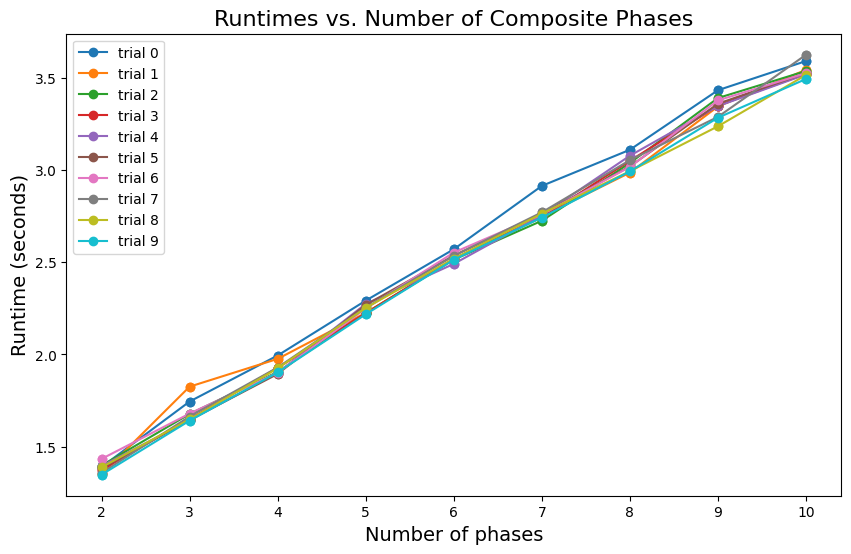

In [41]:
# Plot
plt.figure(figsize=(10, 6))

for i in range(num_trials):

    plt.plot(phases, runtimes[:, i], marker='o', linestyle='-', label=f'trial {i}')
    plt.scatter(phases, runtimes[:, i])

plt.xlabel('Number of phases', fontsize=14)
plt.ylabel('Runtime (seconds)', fontsize=14)
plt.title('Runtimes vs. Number of Composite Phases', fontsize=16)
plt.legend()

plt.show()

In [42]:
# Statistics
min_runtime = np.min(runtimes)
max_runtime = np.max(runtimes)
avg_runtime = np.mean(runtimes)
med_runtime = np.median(runtimes)

print(f'Min runtime: {min_runtime}')
print(f'Max runtime: {max_runtime}')
print(f'Average runtime: {avg_runtime}')
print(f'Median runtime: {med_runtime}')

Min runtime: 1.347482681274414
Max runtime: 3.6251418590545654
Average runtime: 2.4937769810358685
Median runtime: 2.5185325145721436
